In [7]:
import sys

!{sys.executable} -m pip  install --quiet python-snappy pyarrow memray pandas watermark ipywidgets bs4 polars rich humanize matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [28]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [8]:
%load_ext memray

The memray extension is already loaded. To reload it, use:
  %reload_ext memray


In [9]:
from pyarrow import json
from pathlib import Path
import os

import pandas as pd
import matplotlib as plt
import numpy as np

In [76]:
df_parquet = pd.read_parquet(
    "/Users/vicki/viberary/viberary/jsonparquet/src/main/resources/goodreads.parquet",
    engine="pyarrow",
)

In [77]:
# convert to numerical types for working
df_parquet["average_rating"] = pd.to_numeric(
    df_parquet["average_rating"], errors="coerce"
)
df_parquet["num_pages"] = pd.to_numeric(df_parquet["num_pages"], errors="coerce")
df_parquet["publication_day"] = pd.to_numeric(
    df_parquet["publication_day"], errors="coerce"
)
df_parquet["publication_month"] = pd.to_numeric(
    df_parquet["publication_month"], errors="coerce"
)
df_parquet["publication_year"] = pd.to_numeric(
    df_parquet["publication_year"], errors="coerce"
)
df_parquet["ratings_count"] = pd.to_numeric(df_parquet["ratings_count"], errors="coerce")
df_parquet["text_reviews_count"] = pd.to_numeric(
    df_parquet["text_reviews_count"], errors="coerce"
)

In [20]:
df_parquet.dtypes

asin                     object
authors                  object
average_rating          float64
book_id                  object
country_code             object
description              object
edition_information      object
format                   object
image_url                object
is_ebook                 object
isbn                     object
isbn13                   object
kindle_asin              object
language_code            object
link                     object
num_pages               float64
popular_shelves          object
publication_day         float64
publication_month       float64
publication_year        float64
publisher                object
ratings_count           float64
series                   object
similar_books            object
text_reviews_count      float64
title                    object
title_without_series     object
url                      object
work_id                  object
dtype: object

In [23]:
df_parquet.memory_usage(deep=True)

Index                          128
asin                     139252193
authors                  283278600
average_rating            18885240
book_id                  152269572
country_code             139277665
description             1776874329
edition_information      137540356
format                   150446436
image_url                301792171
is_ebook                 145679255
isbn                     148324804
isbn13                   155085970
kindle_asin              144706635
language_code            138756091
link                     282862655
num_pages                 18885240
popular_shelves          283278600
publication_day           18885240
publication_month         18885240
publication_year          18885240
publisher                161610965
ratings_count             18885240
series                   283278600
similar_books            283278600
text_reviews_count        18885240
title                    223095995
title_without_series     223095995
url                 

In [26]:
# Memory used by the DF in-memory
memory = df_parquet.memory_usage(deep=True).sum()
f"{memory / 1000000000:.2f} GB"

'6.12 GB'

In [22]:
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360655 entries, 0 to 2360654
Data columns (total 29 columns):
 #   Column                Dtype  
---  ------                -----  
 0   asin                  object 
 1   authors               object 
 2   average_rating        float64
 3   book_id               object 
 4   country_code          object 
 5   description           object 
 6   edition_information   object 
 7   format                object 
 8   image_url             object 
 9   is_ebook              object 
 10  isbn                  object 
 11  isbn13                object 
 12  kindle_asin           object 
 13  language_code         object 
 14  link                  object 
 15  num_pages             float64
 16  popular_shelves       object 
 17  publication_day       float64
 18  publication_month     float64
 19  publication_year      float64
 20  publisher             object 
 21  ratings_count         float64
 22  series                object 
 23  similar

In [ ]:
import matplotlib.pyplot as plt


histo = df_parquet.groupby("country_code").size()
plt.figure()
histo.plot.bar()
plt.axhline(0, color="k")

In [29]:
df_parquet.describe()

,average_rating,num_pages,publication_day,publication_month,publication_year,ratings_count,text_reviews_count
count,2360131.00000,1596522.00000,1336226.00000,1477710.00000,1761030.00000,2360131.00000,2360131.00000
mean,3.86579,263.56389,12.10038,6.42277,2007.61449,406.30737,28.08668
std,0.54068,829.87442,10.00578,3.42444,248.07579,11126.34739,378.78065
min,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000
25%,3.63000,147.00000,1.00000,3.00000,2004.00000,6.00000,2.00000
50%,3.91000,245.00000,11.00000,6.00000,2011.00000,20.00000,4.00000
75%,4.16000,344.00000,21.00000,9.00000,2014.00000,77.00000,11.00000
max,5.00000,945077.00000,127.00000,25.00000,65535.00000,4899965.00000,142645.00000


In [30]:
df_parquet.head()

,asin,authors,average_rating,book_id,country_code,description,edition_information,format,image_url,is_ebook,...,publication_year,publisher,ratings_count,series,similar_books,text_reviews_count,title,title_without_series,url,work_id
0,,"[{'author_id': '604031', 'role': ''}]",4.00000,5333265,US,,,Paperback,https://images.gr-assets.com/books/1310220028m...,false,...,1984.00000,St. Martin's Press,3.00000,[],[],1.00000,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-...,5400751
1,,"[{'author_id': '626222', 'role': ''}]",3.23000,1333909,US,"Anita Diamant's international bestseller ""The ...",Abridged,Audio CD,https://s.gr-assets.com/assets/nophoto/book/11...,false,...,2001.00000,Simon & Schuster Audio,10.00000,[],"[8709549, 17074050, 28937, 158816, 228563, 112...",6.00000,Good Harbor,Good Harbor,https://www.goodreads.com/book/show/1333909.Go...,1323437
2,B00071IKUY,"[{'author_id': '10333', 'role': ''}]",4.03000,7327624,US,Omnibus book club edition containing the Ladie...,Book Club Edition,Hardcover,https://images.gr-assets.com/books/1304100136m...,false,...,1987.00000,"Nelson Doubleday, Inc.",140.00000,[189911],"[19997, 828466, 1569323, 425389, 1176674, 2627...",7.00000,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",https://www.goodreads.com/book/show/7327624-th...,8948723
3,,"[{'author_id': '9212', 'role': ''}]",3.49000,6066819,US,Addie Downs and Valerie Adler were eight when ...,,Hardcover,https://s.gr-assets.com/assets/nophoto/book/11...,false,...,2009.00000,Atria Books,51184.00000,[],"[6604176, 6054190, 2285777, 82641, 7569453, 70...",3282.00000,Best Friends Forever,Best Friends Forever,https://www.goodreads.com/book/show/6066819-be...,6243154
4,,"[{'author_id': '149918', 'role': ''}]",3.40000,287140,US,,,,https://images.gr-assets.com/books/1413219371m...,false,...,NaN,,15.00000,[],[],5.00000,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...,https://www.goodreads.com/book/show/287140.Run...,278577


In [75]:
# Null values by column
df_parquet.isnull().sum() * 100 / len(df_parquet)

asin                    0.00000
authors                 0.00000
average_rating          0.02220
book_id                 0.00000
country_code            0.00000
description             0.00000
edition_information     0.00000
format                  0.00000
image_url               0.00000
is_ebook                0.00000
isbn                    0.00000
isbn13                  0.00000
kindle_asin             0.00000
language_code           0.00000
link                    0.00000
num_pages              32.36953
publication_day        43.39596
publication_month      37.40254
publication_year       25.40079
publisher               0.00000
ratings_count           0.02220
series                  0.00000
similar_books           0.00000
text_reviews_count      0.02220
title                   0.00000
title_without_series    0.00000
url                     0.00000
work_id                 0.00000
dtype: float64

In [42]:
# What percent have asin?
len(df_parquet[df_parquet["asin"].astype(bool)]) / len(df_parquet) * 100

19.88926802095181

In [78]:
# Unnest JSOn
L = [{**{"i": k, **y}} for k, v in df_parquet.pop("popular_shelves").items() for y in v]
df_2 = df_parquet.join(pd.DataFrame(L).set_index("i")).reset_index(drop=True)

In [79]:
df_2

,asin,authors,average_rating,book_id,country_code,description,edition_information,format,image_url,is_ebook,...,ratings_count,series,similar_books,text_reviews_count,title,title_without_series,url,work_id,count,name
0,,"[{'author_id': '604031', 'role': ''}]",4.00000,5333265,US,,,Paperback,https://images.gr-assets.com/books/1310220028m...,false,...,3.00000,[],[],1.00000,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-...,5400751,3,to-read
1,,"[{'author_id': '604031', 'role': ''}]",4.00000,5333265,US,,,Paperback,https://images.gr-assets.com/books/1310220028m...,false,...,3.00000,[],[],1.00000,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-...,5400751,1,p
2,,"[{'author_id': '604031', 'role': ''}]",4.00000,5333265,US,,,Paperback,https://images.gr-assets.com/books/1310220028m...,false,...,3.00000,[],[],1.00000,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-...,5400751,1,collection
3,,"[{'author_id': '604031', 'role': ''}]",4.00000,5333265,US,,,Paperback,https://images.gr-assets.com/books/1310220028m...,false,...,3.00000,[],[],1.00000,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-...,5400751,1,w-c-fields
4,,"[{'author_id': '604031', 'role': ''}]",4.00000,5333265,US,,,Paperback,https://images.gr-assets.com/books/1310220028m...,false,...,3.00000,[],[],1.00000,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,https://www.goodreads.com/book/show/5333265-w-...,5400751,1,biography
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128835932,B000W914MC,"[{'author_id': '621880', 'role': ''}]",3.52000,11419866,US,,,,https://s.gr-assets.com/assets/nophoto/book/11...,true,...,7.00000,[],"[2685097, 1866878, 2597992, 6282598, 5665466, ...",1.00000,The Spanish Duke's Virgin Bride (Innocent Mist...,The Spanish Duke's Virgin Bride (Innocent Mist...,https://www.goodreads.com/book/show/11419866-t...,2206102,1,in-over-his-head
128835933,B000W914MC,"[{'author_id': '621880', 'role': ''}]",3.52000,11419866,US,,,,https://s.gr-assets.com/assets/nophoto/book/11...,true,...,7.00000,[],"[2685097, 1866878, 2597992, 6282598, 5665466, ...",1.00000,The Spanish Duke's Virgin Bride (Innocent Mist...,The Spanish Duke's Virgin Bride (Innocent Mist...,https://www.goodreads.com/book/show/11419866-t...,2206102,1,hunky-heroes
128835934,B000W914MC,"[{'author_id': '621880', 'role': ''}]",3.52000,11419866,US,,,,https://s.gr-assets.com/assets/nophoto/book/11...,true,...,7.00000,[],"[2685097, 1866878, 2597992, 6282598, 5665466, ...",1.00000,The Spanish Duke's Virgin Bride (Innocent Mist...,The Spanish Duke's Virgin Bride (Innocent Mist...,https://www.goodreads.com/book/show/11419866-t...,2206102,1,humor
128835935,B000W914MC,"[{'author_id': '621880', 'role': ''}]",3.52000,11419866,US,,,,https://s.gr-assets.com/assets/nophoto/book/11...,true,...,7.00000,[],"[2685097, 1866878, 2597992, 6282598, 5665466, ...",1.00000,The Spanish Duke's Virgin Bride (Innocent Mist...,The Spanish Duke's Virgin Bride (Innocent Mist...,https://www.goodreads.com/book/show/11419866-t...,2206102,1,h-i-would-trade-my-husband-for


In [36]:
df_parquet.asin.value_counts()

              1891138
B01864DUWQ          2
B00S3XFDCQ          1
B00RW8JHSE          1
B0182T9IBW          1
               ...   
B007M4FROQ          1
B01FZQKH4W          1
B00DQS9WMU          1
B00YBBMWFU          1
B000W914MC          1
Name: asin, Length: 469517, dtype: int64

In [80]:
# What percent have description?
len(df_parquet[df_parquet["description"].astype(bool)]) / len(df_parquet) * 100

82.53734662625415

In [82]:
# What percent have title?
len(df_parquet[df_parquet["title"].astype(bool)]) / len(df_parquet) * 100

99.99970347212955

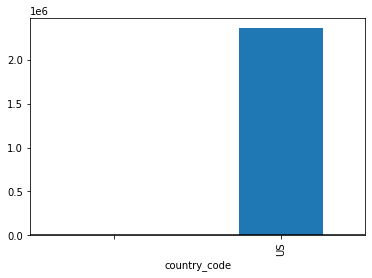

In [85]:
# Language
import matplotlib.pyplot as plt


histo = df_parquet.groupby("country_code").size()
plt.figure()
histo.plot.bar()
plt.axhline(0, color="k")

In [ ]:
# Avg rating
import matplotlib.pyplot as plt


histo = df_parquet.groupby("average_rating").size()
plt.figure()
histo.plot.bar()
plt.axhline(0, color="k")
plt.xticks(range(0, 5));

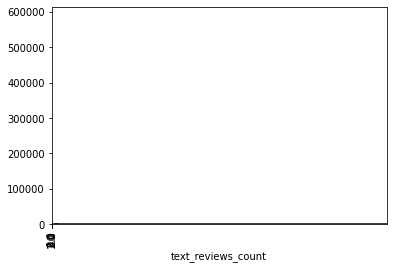

In [91]:
# Text reviews count
import matplotlib.pyplot as plt


histo = df_parquet.groupby("text_reviews_count").size()
plt.figure()
histo.plot.bar()
plt.axhline(0, color="k")
plt.xticks(range(0, 5));

In [ ]:
# Avg rating
import matplotlib.pyplot as plt


histo = df_parquet.groupby("average_rating").size()
plt.figure()
histo.plot.bar()
plt.axhline(0, color="k")
plt.xticks(range(min(histo), max(histo) + 1))